In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("pseudo_customer_data.csv", na_values = '-', encoding='latin-1')

In [5]:
data

,CustomerID,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase History,Sales
0,1,41,Female,147,79,35,245
1,2,42,Male,37,32,31,403
2,3,24,Female,72,8,41,492
3,4,69,Male,60,97,70,350
4,5,23,Female,36,18,58,348
...,...,...,...,...,...,...,...
4995,4996,36,Male,55,41,20,160
4996,4997,64,Female,135,22,26,130
4997,4998,22,Male,122,27,40,320
4998,4999,64,Female,79,21,62,682


In [7]:
null_rows = data[data.isnull().any(axis=1)]
null_rows

,CustomerID,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase History,Sales


There are no null rows, and all columns appear to have no null values
Data Processing: Clean dataset by handling missing values, encoding categorical variables and scaling numerical features. 

In [10]:
missing_values = data.isnull().sum()
missing_values

CustomerID                0
Age                       0
Gender                    0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase History          0
Sales                     0
dtype: int64

In [12]:
# encode categorical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data['Gender'])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[["Age","Annual Income (k$)", "Spending Score (1-100)"]]=scaler.fit_transform(data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

Customer Segmentation: Use K-Means clustering to segment the customers based on their features (Age, Gender, Annual Income, Spending Score). Visualize the clusters using appropriate plots. Interpret the clusters and describe the characteristics of each customer segment.

In [17]:
X = data[["Age","Gender","Annual Income (k$)", "Spending Score (1-100)"]]
X

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,-0.174688,0,1.693494,1.013533
1,-0.107573,1,-1.152045,-0.617459
2,-1.315653,0,-0.246646,-1.450306
3,1.704548,1,-0.557069,1.638168
4,-1.382769,0,-1.177914,-1.103286
...,...,...,...,...
4995,-0.510266,1,-0.686411,-0.305141
4996,1.368970,0,1.383072,-0.964478
4997,-1.449884,1,1.046781,-0.790969
4998,1.368970,0,-0.065566,-0.999180


In [19]:
from sklearn.cluster import KMeans

In [21]:
from kneed import KneeLocator
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=100, n_init=1, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
kl = KneeLocator(range(1,11), sse, curve='convex', direction="decreasing")

kl.elbow

4

In [54]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
data['Cluster'] = kmeans.fit_predict(X)
data['Cluster']

0       3
1       1
2       2
3       1
4       2
       ..
4995    2
4996    3
4997    2
4998    1
4999    3
Name: Cluster, Length: 5000, dtype: int32

In [56]:
np.unique(data['Cluster'])

array([0, 1, 2, 3])

In [29]:
# Reassign cluster labels to be sequential
#unique_clusters = np.unique(data['Cluster'])
#cluster_map = {old_label: new_label for new_label, old_label in enumerate(unique_clusters)}
#data['Cluster'] = data['Cluster'].map(cluster_map)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

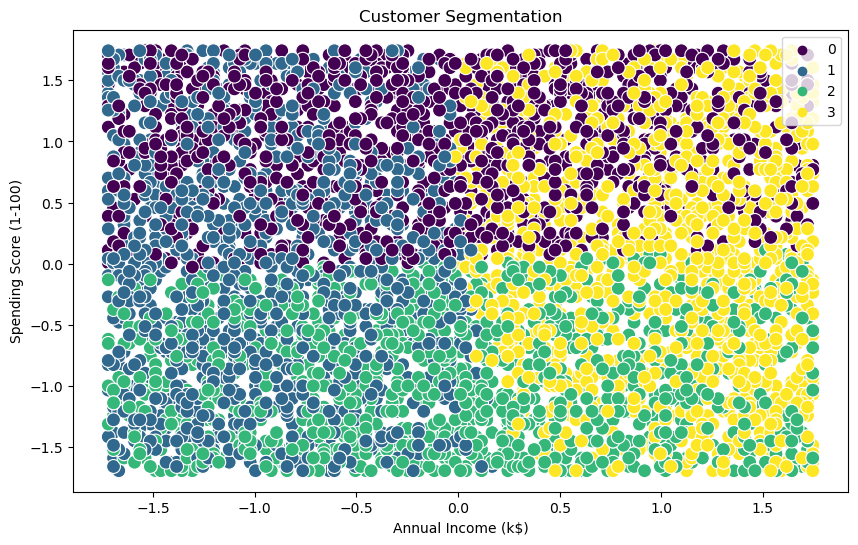

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
Interpret the clusters and describe the characteristics of each customer segment

Feature Engineering:  Create additional features if necessary to build/ improve the predictive model. Perform any feature selection methods to retain the most relevant features for prediction.

In [80]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(cluster_centers)


# Analyze each cluster's characteristics
cluster_summary = data.groupby('Cluster').mean()  # Mean values for each cluster
print(cluster_summary)

        Age    Gender  Annual Income (k$)  Spending Score (1-100)
0 -0.813748  0.505645           -0.109480                0.962795
1  0.882840  0.485554           -0.928675               -0.080080
2 -0.833355  0.500000            0.020725               -0.935785
3  0.734785  0.486698            0.991603                0.048938
          CustomerID       Age    Gender  Annual Income (k$)  \
Cluster                                                        
0        2515.432258 -0.815047  0.504839           -0.108980   
1        2529.329053  0.883809  0.486356           -0.928176   
2        2467.529935 -0.833029  0.500000            0.019720   
3        2489.791080  0.734785  0.486698            0.991603   

         Spending Score (1-100)  Purchase History       Sales  
Cluster                                                        
0                      0.961592         51.550806  492.105645  
1                     -0.078687         50.742376  477.304173  
2                     -0.9359

In [82]:
y = data["Sales"]
correlation_matrix = data.corr()["Sales"].abs().sort_values(ascending=False)
correlation_matrix

Sales                     1.000000
Purchase History          0.839699
Gender                    0.017465
Spending Score (1-100)    0.011707
Annual Income (k$)        0.011673
Cluster                   0.007360
Age                       0.006708
CustomerID                0.001652
Name: Sales, dtype: float64

In [114]:
X = data.drop(["Sales","CustomerID"], axis=1)
X

,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase History,Cluster
0,-0.174688,0,1.693494,1.013533,35,3
1,-0.107573,1,-1.152045,-0.617459,31,1
2,-1.315653,0,-0.246646,-1.450306,41,2
3,1.704548,1,-0.557069,1.638168,70,1
4,-1.382769,0,-1.177914,-1.103286,58,2
...,...,...,...,...,...,...
4995,-0.510266,1,-0.686411,-0.305141,20,2
4996,1.368970,0,1.383072,-0.964478,26,3
4997,-1.449884,1,1.046781,-0.790969,40,2
4998,1.368970,0,-0.065566,-0.999180,62,1


In [86]:
y

0       245
1       403
2       492
3       350
4       348
       ... 
4995    160
4996    130
4997    320
4998    682
4999    708
Name: Sales, Length: 5000, dtype: int64

Sales Prediction: Split the dataset into training and testing sets. Apply regression techniques (e.g., Linear Regression, Random Forest Regression) to predict sales for each customer segment identified in Task 2. Evaluate the models using appropriate metrics (e.g., Mean Absolute Error, R-squared).

In [88]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [120]:
model1 = LinearRegression()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

# Check and print performance of the regression model
print(f'Test Score (R-Squared): {model1.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))}')

Test Score (R-Squared): 0.7122736023255649
MAE: 126.46993253773232
RMSE: 11.24588513802859


In [112]:
model2 = RandomForestRegressor(n_estimators=100,random_state=42)

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

# Check and print performance of the regression model
print(f'Test Score (R-Squared): {model2.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))}')

Test Score (R-Squared): -0.08771822658430328
MAE: 263.62586833333336
RMSE: 16.23655962121697


Ensemble Learning: Implement an ensemble learning method (e.g., Gradient Boosting, XGBoost) to improve the predictive performance. Compare the performance of the ensemble model with the individual models from Task 4.

In [140]:
# The model gradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# initialize the third model. 
model3 = GradientBoostingRegressor(n_estimators=100,random_state=42)

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

# Check and print perfomance of the regression model
print(f'Test Score (R-Squared): {model3.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))}')

Test Score (R-Squared): 0.7059681277700726
MAE: 127.21280820201858
RMSE: 11.278865554745236


Conclusion and Recommendations: Summarize the findings from the clustering and regression analysis. Provide recommendations based on the customer segments and sales predictions, such as targeted marketing strategies for different segments.

Findings:

Segment 0: This segment is made up of younger, moderate income, high spenders.
Segment 1: Older, lower income, average spenders.
Segment 2: Young, high-income, conservative spenders.
Segment 3: Older, higher income, average spenders like Segment 1 but more potential.

Sales Predictions:
Segments 0 and 3 drive significant sales.
Segments 1 and 2 are stable but need different approaches.

Recommendations:
Segment 0: Provide personalized luxury campaigns on platforms.
Segment 1: Value-focused retention strategies and tailored messages.
Segment 2: Educational campaigns and incentivized promotions.
Segment 3: Premium marketing with exclusive offerings.
